# Basic Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
df1 = pd.read_csv('features.csv')
df2 = pd.read_csv('labels.csv',index_col='respondent_id')
df2


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [4]:
df1.head(n=30)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [5]:
df2.tail()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26702,0,0
26703,0,0
26704,0,1
26705,0,0
26706,0,0


In [6]:
df1.shape, df2.shape

((26707, 36), (26707, 2))

# Data Preprocessing

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
df1.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [9]:
df1.corr()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.003149,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726
h1n1_concern,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525
h1n1_knowledge,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583
behavioral_antiviral_meds,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822
behavioral_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328
behavioral_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826
behavioral_wash_hands,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764
behavioral_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449
behavioral_outside_home,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558
behavioral_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606


# Data preprocessing

In [10]:
df1.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [11]:
df1.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

# Numerical Data

In [13]:
df_num = df1.select_dtypes(exclude = 'object')
df_num

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


In [14]:
df_num

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='median')
df_num.iloc[:,:] = imputer.fit_transform(df_num)

In [16]:

df_num.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

# Categorical Data

In [18]:
df_obj = df1.select_dtypes(include="object")
df_obj

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_obj.iloc[:,:] = imputer.fit_transform(df_obj)

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_obj = df_obj.apply(label.fit_transform)

In [21]:
df = pd.concat([df_obj,df_num,df2], axis=1)
df.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,3,1,3,0,2,1,0,1,8,2,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,1,0,3,1,2,1,1,0,1,0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,0,2,3,1,0,1,0,0,9,0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,4,0,3,0,2,1,1,1,5,1,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2,3,3,0,0,0,0,0,9,0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0


In [22]:
df

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,3,1,3,0,2,1,0,1,8,2,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,1,0,3,1,2,1,1,0,1,0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,0,2,3,1,0,1,0,0,9,0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,4,0,3,0,2,1,1,1,5,1,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2,3,3,0,0,0,0,0,9,0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,3,3,0,0,1,0,1,9,2,...,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0
26703,0,2,3,1,0,1,1,0,6,1,...,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0
26704,3,3,3,0,0,1,0,0,6,0,...,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1
26705,0,3,1,0,0,0,1,0,5,2,...,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0,0


In [23]:
df.dtypes

age_group                        int32
education                        int32
race                             int32
sex                              int32
income_poverty                   int32
marital_status                   int32
rent_or_own                      int32
employment_status                int32
hhs_geo_region                   int32
census_msa                       int32
employment_industry              int32
employment_occupation            int32
respondent_id                  float64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months     

# Dropping Columns

In [24]:
#data = df.drop(df.iloc[:,16:18], inplace = True, axis = 1) 

df.drop(['respondent_id','employment_industry','employment_occupation','hhs_geo_region','health_insurance'], axis = 1,inplace = True) 
df   

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,h1n1_concern,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,3,1,3,0,2,1,0,1,2,1.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,1,0,3,1,2,1,1,0,0,3.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,0,2,3,1,0,1,0,0,0,1.0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,4,0,3,0,2,1,1,1,1,1.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2,3,3,0,0,0,0,0,0,2.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,3,3,0,0,1,0,1,2,2.0,...,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0
26703,0,2,3,1,0,1,1,0,1,1.0,...,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0
26704,3,3,3,0,0,1,0,0,0,2.0,...,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1
26705,0,3,1,0,0,0,1,0,2,1.0,...,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0,0


In [25]:
df.dtypes

age_group                        int32
education                        int32
race                             int32
sex                              int32
income_poverty                   int32
marital_status                   int32
rent_or_own                      int32
employment_status                int32
census_msa                       int32
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_va

# Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
x_lr = df.iloc[:,:-2]
y_lr = df.iloc[:,-1]


In [28]:
bestfeatures = SelectKBest(chi2,k=15)
fit = bestfeatures.fit(x_lr,y_lr)

In [29]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_lr.columns)

In [30]:
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

In [31]:
featurescores

,feature_names,Scores
0,age_group,1997.217625
1,education,5.762772
2,race,91.674338
3,sex,94.243768
4,income_poverty,38.808131
5,marital_status,26.849772
6,rent_or_own,215.311327
7,employment_status,67.380193
8,census_msa,7.253763
9,h1n1_concern,325.148276


In [32]:
print(featurescores.nlargest(22,'Scores'))

                  feature_names       Scores
27            opinion_seas_risk  2794.888237
19         doctor_recc_seasonal  2421.579654
0                     age_group  1997.217625
26  opinion_seas_vacc_effective   991.273021
24            opinion_h1n1_risk   866.169464
18             doctor_recc_h1n1   839.733852
20        chronic_med_condition   557.625394
30           household_children   538.442999
22                health_worker   383.862558
9                  h1n1_concern   325.148276
23  opinion_h1n1_vacc_effective   286.280388
6                   rent_or_own   215.311327
17        behavioral_touch_face   123.369866
10               h1n1_knowledge   115.652237
3                           sex    94.243768
2                          race    91.674338
28  opinion_seas_sick_from_vacc    80.551802
29             household_adults    71.806568
15  behavioral_large_gatherings    69.677957
7             employment_status    67.380193
13         behavioral_face_mask    62.214095
14        

# splitting Data

In [33]:
x = df.loc[:,['opinion_seas_risk','doctor_recc_seasonal','age_group','opinion_seas_vacc_effective','opinion_h1n1_risk',
                'doctor_recc_h1n1','chronic_med_condition','household_children','health_worker','h1n1_concern','opinion_h1n1_vacc_effective',
                'rent_or_own','behavioral_touch_face','h1n1_knowledge','sex','race','opinion_seas_sick_from_vacc','household_adults',
                'behavioral_large_gatherings','employment_status','behavioral_face_mask','behavioral_wash_hands']]
             
             
y = df.iloc[:,-1]
x

,opinion_seas_risk,doctor_recc_seasonal,age_group,opinion_seas_vacc_effective,opinion_h1n1_risk,doctor_recc_h1n1,chronic_med_condition,household_children,health_worker,h1n1_concern,...,behavioral_touch_face,h1n1_knowledge,sex,race,opinion_seas_sick_from_vacc,household_adults,behavioral_large_gatherings,employment_status,behavioral_face_mask,behavioral_wash_hands
0,1.0,0.0,3,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0,3,2.0,0.0,0.0,1,0.0,0.0
1,2.0,0.0,1,4.0,4.0,0.0,0.0,0.0,0.0,3.0,...,1.0,2.0,1,3,4.0,0.0,0.0,0,0.0,1.0
2,1.0,0.0,0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1,3,2.0,2.0,0.0,0,0.0,0.0
3,4.0,1.0,4,5.0,3.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0,3,1.0,0.0,1.0,1,0.0,1.0
4,1.0,0.0,2,3.0,3.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0,3,4.0,1.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,4,5.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0,3,2.0,0.0,0.0,1,0.0,0.0
26703,1.0,1.0,0,5.0,2.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1,3,1.0,1.0,0.0,0,0.0,1.0
26704,4.0,0.0,3,5.0,4.0,0.0,0.0,0.0,0.0,2.0,...,1.0,2.0,0,3,2.0,0.0,1.0,0,1.0,1.0
26705,1.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0,1,2.0,1.0,0.0,0,0.0,0.0


# Checking Imbalance data

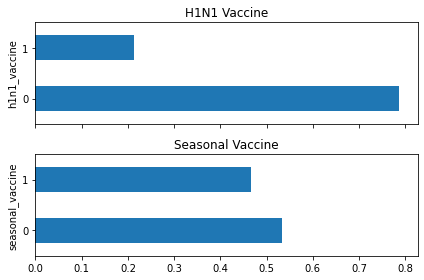

In [34]:
fig, ax = plt.subplots(2, 1, sharex=True)
n_obs = df2.shape[0]

(df2['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(df2['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [35]:
y.shape

(26707,)

In [36]:
len(x.columns)

22

# Balancing Imbalance data

In [56]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x_train_res,y_train_res = os.fit_sample(x,y)
x_train_res.shape,y_train_res.shape

((28544, 22), (28544,))

In [57]:
from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_train_res)))

original dataset shape Counter({0: 14272, 1: 12435})
Resampled dataset shapeCounter({0: 14272, 1: 14272})


# Train and Test Model

In [58]:
from sklearn.model_selection import train_test_split

In [59]:

x_train,x_test,y_train,y_test = train_test_split(x_train_res,y_train_res,test_size=0.20,random_state =45)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,log_loss,roc_auc_score,accuracy_score

# Gradient Boosting Algorithm

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model_gc = GradientBoostingClassifier()
model_gc.fit(x_train,y_train)
gc_pred = model_gc.predict(x_test)

In [62]:
print(confusion_matrix(y_test,gc_pred))
print(log_loss(y_test,gc_pred))
print(classification_report(y_test,gc_pred))

[[2251  639]
 [ 579 2240]]
7.36884578590981
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2890
           1       0.78      0.79      0.79      2819

    accuracy                           0.79      5709
   macro avg       0.79      0.79      0.79      5709
weighted avg       0.79      0.79      0.79      5709



In [63]:
gc_pred = model_gc.predict_proba(x_test)[:,1]

In [64]:
roc_auc_score(y_test,gc_pred)

0.8611587706259184

Text(0.5, 1.0, 'seasonal_vaccine ROC_Curve:AUC=0.861159\n')

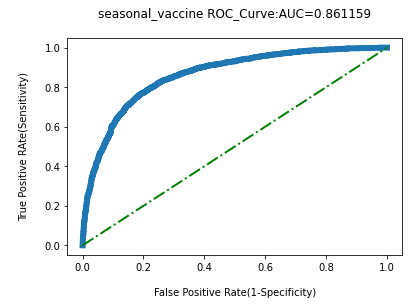

In [76]:
from sklearn.metrics import roc_curve,roc_auc_score
gc_pred = model_gc.predict_proba(x_test)[:,1]
ftr,tpr,thresholds = roc_curve(y_test,gc_pred)
plt.plot(ftr,tpr,lw = 6)
plt.plot([0,1],[0,1],color = "green",linestyle = "dashdot",lw=2)
plt.xlabel('\nFalse Positive Rate(1-Specificity)')
plt.ylabel('\nTrue Positive RAte(Sensitivity)\n')
plt.title(f"seasonal_vaccine ROC_Curve:AUC={roc_auc_score(y_test,gc_pred):4f}\n")